# Jupyter notebook that generates the figures associated with the fMRS demo.

Generates:
- Supporting figures that quantify per-subject (first level) and group (higher level) accuracy in beta estimation
- Main figure that visually shows estimated traces compared with ground truth for the group analysis

## Compare single subject values

In [1]:
import pandas as pd

true_values = pd.read_csv('fsl_mrs_fmrs_demo/simulated_data/true_values.csv', index_col=[0, 1])
true_values

noise  gamma  sigma  sigma_delta  sigma_drift  Asc_beta0  \
sub0 stim  60.628651   25.0   15.0    -1.050311     0.640423        0.0   
     ctrl  66.575519   25.0   15.0     0.000000     0.357380        0.0   
sub1 stim  68.445537   25.0   15.0    -1.033423     1.574408        0.0   
     ctrl  65.750828   25.0   15.0     0.000000    -2.365304        0.0   
sub2 stim  65.144272   25.0   15.0    -0.833423    -0.239937        0.0   
     ctrl  65.011991   25.0   15.0     0.000000    -0.152339        0.0   
sub3 stim  56.947567   25.0   15.0    -1.044505    -1.416489        0.0   
     ctrl  54.473164   25.0   15.0     0.000000     1.030155        0.0   
sub4 stim  58.024951   25.0   15.0    -0.966327     1.474823        0.0   
     ctrl  62.917671   25.0   15.0     0.000000    -1.438523        0.0   
sub5 stim  57.287824   25.0   15.0    -1.141432     1.059899        0.0   
     ctrl  56.434460   25.0   15.0     0.000000    -0.344999        0.0   
sub6 stim  63.695890   25.0   15.0    -1.008570     1.826694        0.0   
     ctrl  54.982202   25.0   15.0     0.000000    -0.779558        0.0   
sub7 stim  56.670620   25.0   15.0    -1.036598    -0.774198        0.0   
     ctrl  71.958423   25.0   15.0     0.000000    -1.686153        0.0   
sub8 stim  47.418301   25.0   15.0    -1.030590     0.143670        0.0   
     ctrl  62.633779   25.0   15.0     0.000000     1.375445        0.0   
sub9 stim  65.102279   25.0   15.0    -0.945509     0.239228        0.0   
     ctrl  55.044521   25.0   15.0     0.000000     0.021704        0.0   

           Asc_beta1  Asc_beta2  Asc_beta3  Asp_beta0  ...  PE_beta2  \
sub0 stim        0.0  -0.046413   0.879650  -0.145761  ... -0.015074   
     ctrl        0.0  -0.025021   0.959332   0.000000  ...  0.021807   
sub1 stim        0.0   0.046195   0.849678  -0.162532  ... -0.019677   
     ctrl        0.0   0.033436   1.010943   0.000000  ...  0.035349   
sub2 stim        0.0   0.016326   0.803571  -0.108032  ...  0.012469   
     ctrl        0.0   0.027808   0.809280   0.000000  ... -0.007677   
sub3 stim        0.0   0.030826   1.373371  -0.043814  ...  0.008219   
     ctrl        0.0   0.038287   0.839354   0.000000  ... -0.033801   
sub4 stim        0.0  -0.023410   0.904890  -0.167182  ... -0.046044   
     ctrl        0.0   0.020785   0.758693   0.000000  ...  0.015917   
sub5 stim        0.0   0.017069   1.259926  -0.037891  ...  0.004255   
     ctrl        0.0  -0.040193   0.960332   0.000000  ...  0.030749   
sub6 stim        0.0  -0.017664   0.944614   0.017389  ...  0.007617   
     ctrl        0.0  -0.002629   0.930587   0.000000  ...  0.015223   
sub7 stim        0.0  -0.024777   0.780824  -0.128652  ... -0.040352   
     ctrl        0.0   0.021639   1.128022   0.000000  ...  0.042439   
sub8 stim        0.0  -0.031312   0.982823  -0.295361  ... -0.019545   
     ctrl        0.0  -0.013847   1.220790   0.000000  ... -0.039489   
sub9 stim        0.0  -0.012385   0.797737  -0.275385  ...  0.033161   
     ctrl        0.0  -0.000294   1.037356   0.000000  ...  0.002593   

           PE_beta3  Scyllo_beta0  Scyllo_beta1  Scyllo_beta2  Scyllo_beta3  \
sub0 stim  0.961735           0.0           0.0      0.010537      0.488703   
     ctrl  0.776678           0.0           0.0      0.011666      0.357175   
sub1 stim  0.973041           0.0           0.0      0.008589      0.267913   
     ctrl  1.039999           0.0           0.0      0.004533      0.361978   
sub2 stim  0.688001           0.0           0.0     -0.009084      0.371706   
     ctrl  0.875631           0.0           0.0     -0.010459      0.218082   
sub3 stim  0.936644           0.0           0.0      0.006105      0.230432   
     ctrl  0.976370           0.0           0.0      0.005830      0.363319   
sub4 stim  1.121299           0.0           0.0      0.013250      0.324375   
     ctrl  0.911513           0.0           0.0      0.009212      0.045030   
sub5 stim  1.141651           0.0           0.0      0.00

load single subject results

In [43]:
from pathlib import Path
first_level_res_dir = Path('fsl_mrs_fmrs_demo/first_level_results')
all_res = []
sub_order = []
cond_order = []
for file in first_level_res_dir.rglob('dyn_results.csv'):
    sub_order.append(file.parent.parent.name)
    cond_order.append(file.parent.name)
    all_res.append(pd.read_csv(file, index_col=0).loc[0,:])

first_lvl_res = pd.concat(all_res, axis=1).T
first_lvl_res.index = pd.MultiIndex.from_arrays((sub_order, cond_order))
first_lvl_res = first_lvl_res.loc[:, first_lvl_res.columns.str.contains('conc')]
first_lvl_res.columns = first_lvl_res.columns.str.replace('conc_', '')
first_lvl_res.sort_index(axis=0, level=[0, 1], ascending=[True, False], inplace=True)


### Scaling factors
There are two scaling factors needed to make the fitted data comparable with the true values:
1. The scaling of the basis set and the combined FIDs for each subject. The fitting performs automatic rescaling on fitting.
2. An additional scaling factor for the macromolecules which are scaled independently of the other basis terms in the data generation.

In [116]:
from fsl_mrs.utils import mrs_io
from fsl_mrs.utils.misc import rescale_FID
import numpy as np

basis = mrs_io.read_basis('fsl_mrs_fmrs_demo/basis/')
basis_scale = basis.get_rescale_values(bandwidth=3000, points=1024, indept_scale=['Mac'], scale_factor=100.0)

mrs_list = mrs_io.read_FID('fsl_mrs_fmrs_demo/simulated_data/sub0_ctrl.nii.gz').mrs()
scales = []
for mrs in mrs_list:
    scales.append(rescale_FID(mrs.FID, scale=100.0)[1])

fid_scale = np.mean(scales)

scale_metabs = basis_scale[0] * fid_scale * 10
additional_scale_mac= basis_scale[1]

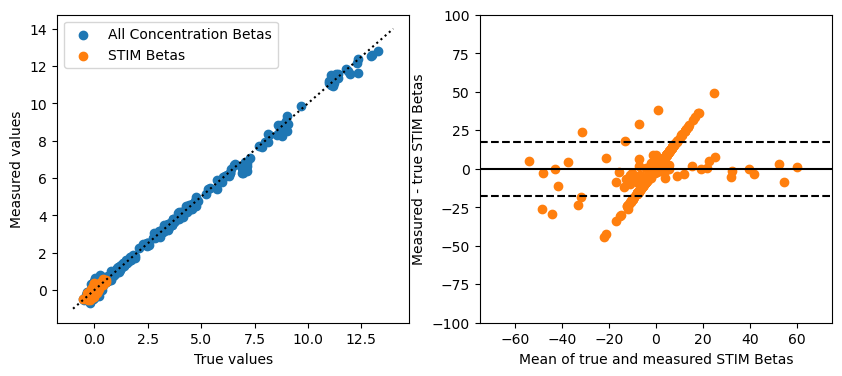

In [342]:
true_concs = true_values.filter(regex='beta')
true_array = true_concs.to_numpy()

first_lvl_res_scaled = first_lvl_res.multiply(scale_metabs)
first_lvl_res_scaled.loc[:, ['Mac_beta0','Mac_beta1','Mac_beta2','Mac_beta3']] = \
    first_lvl_res_scaled.loc[:, ['Mac_beta0','Mac_beta1','Mac_beta2','Mac_beta3']].multiply(additional_scale_mac)

meas_array = first_lvl_res_scaled.to_numpy()



# In original units
true_beta01 = true_concs.filter(regex='beta[01]').to_numpy().flatten()
meas_beta01 = first_lvl_res_scaled.filter(regex='beta[01]').to_numpy().flatten()

# As a percentage change
true_concs.columns = pd.MultiIndex.from_tuples(true_concs.columns.str.split('_').tolist())
true_concs_b3 = true_concs.filter(regex='beta3').droplevel(axis=1, level=1).mean()
true_b01_per = true_concs.filter(regex='beta[01]').divide(true_concs_b3, axis=1, level=0)*100
true_b01_per_array = true_b01_per.to_numpy().flatten()

first_lvl_res_scaled.columns = pd.MultiIndex.from_tuples(first_lvl_res_scaled.columns.str.split('_').tolist())
meas_concs_b3 = first_lvl_res_scaled.filter(regex='beta3').droplevel(axis=1, level=1)
meas_b01_per = first_lvl_res_scaled.filter(regex='beta[01]').divide(true_concs_b3, axis=1, level=0)*100
meas_b01_per = meas_b01_per.to_numpy().flatten()

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].scatter(true_array, meas_array, label='All Concentration Betas')
axes[0].scatter(true_beta01, meas_beta01, label='STIM Betas')
axes[0].plot([-1, 14], [-1, 14], 'k:')
axes[0].legend()
axes[0].set_xlabel('True values')
axes[0].set_ylabel('Measured values')

mean_beta01 = np.stack((true_b01_per_array, meas_b01_per)).mean(axis=0)
diff_beta01 = meas_b01_per - true_b01_per_array
xmin = -75
xmax = 75
axes[1].scatter(mean_beta01, diff_beta01, c=axes[0].get_children()[1]._facecolors)
axes[1].hlines(diff_beta01.mean(),xmin=xmin, xmax=xmax, color='k')
axes[1].hlines(diff_beta01.mean()+diff_beta01.std()*1.96,xmin=xmin, xmax=xmax, color='k',linestyles='--')
axes[1].hlines(diff_beta01.mean()-diff_beta01.std()*1.96,xmin=xmin, xmax=xmax, color='k',linestyles='--')

axes[1].set_xlim([xmin, xmax])
axes[1].set_ylim([-100, 100])
axes[1].set_xlabel('Mean of true and measured STIM Betas')
axes[1].set_ylabel('Measured - true STIM Betas')
plt.savefig('../../publication/figures/s7_first_level_betas.png', dpi=400, bbox_inches='tight', transparent=True)


In [123]:
%%sx
fmrs_stats\
    --data results_list_stim\
    --output demo_results_stim\
    --fl-contrasts fl_contrasts.json\
    --combine NAA NAAG\
    --combine Cr PCr\
    --combine PCh GPC\
    --combine Glu Gln\
    --overwrite

[]

In [ ]:
%%sx
fmrs_stats\
    --data results_list_ctrl\
    --output demo_results_ctrl\
    --fl-contrasts fl_contrasts.json\
    --combine NAA NAAG\
    --combine Cr PCr\
    --combine PCh GPC\
    --combine Glu Gln\
    --overwrite

In [219]:

true_ma = true_b01_per.groupby(axis=1, level=0).mean()
idx = pd.IndexSlice
true_ma_stim = true_ma.loc[idx[:,'stim'],:].droplevel(axis=0, level=1)
true_ma_ctrl = true_ma.loc[idx[:,'ctrl'],:].droplevel(axis=0, level=1)

combined_peaks = [['NAA','NAAG'], ['Cr','PCr'], ['PCh','GPC']]

for peaks in combined_peaks:
    true_ma_stim['+'.join(peaks)] = true_ma_stim.loc[:, peaks[0]] + true_ma_stim.loc[:, peaks[1]]
    true_ma_stim.drop(peaks, axis=1, inplace=True)

    true_ma_ctrl['+'.join(peaks)] = true_ma_ctrl.loc[:, peaks[0]] + true_ma_ctrl.loc[:, peaks[1]]
    true_ma_ctrl.drop(peaks, axis=1, inplace=True)


In [220]:
# Load the results
df_stim = pd.read_csv('demo_results_stim/group_stats.csv',index_col=0, header=[0,])
df_ctrl = pd.read_csv('demo_results_ctrl/group_stats.csv',index_col=0, header=[0,])

# Format for display
def format_df(df):
    df = df.filter(regex='conc_[a-zA-Z\+]+_((mean_activation)|(beta3))', axis=0)
    df.index = pd.MultiIndex.from_tuples(df.index.str.replace('conc_','').str.split('_',n=1).to_list())
    idx = pd.IndexSlice
    df_conc = df.loc[idx[:,'beta3'],'COPE'].droplevel(axis=0, level=1)
    df_act= df.loc[idx[:,'mean_activation'],['COPE','VARCOPE']].droplevel(axis=0, level=1)
    df_act.loc[:,'VARCOPE'] = df_act.loc[:,'VARCOPE'].pow(0.5)
    df_act.rename(columns={'COPE': 'PerChange', 'VARCOPE': 'STD'}, inplace=True)
    df_act_per = df_act.divide(df_conc,axis=0).multiply(100)
    df_act_per = df_act_per.drop(['NAA', 'NAAG', 'Cr', 'PCr', 'GPC', 'PCh', 'Glu+Gln'])
    return df_act_per

df_stim_per = format_df(df_stim)
df_ctrl_per = format_df(df_ctrl)


In [242]:
df_stim_per.STD

Asc         2.793917
Asp         1.356214
GABA        5.504534
GSH         1.459431
Glc         4.947618
Gln         1.422879
Glu         0.522543
Ins         0.287782
Lac         4.993865
Mac         0.234085
PE          3.603027
Scyllo      1.807085
Tau         1.511794
NAA+NAAG    0.099593
Cr+PCr      0.151502
PCh+GPC     0.608016
Name: STD, dtype: float64

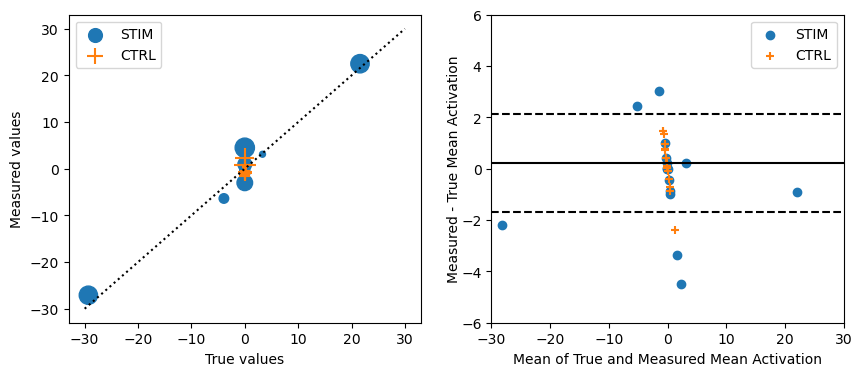

In [343]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].scatter(
    true_ma_stim.mean().to_numpy(),
    df_stim_per.PerChange.to_numpy(),
    s=df_stim_per.STD.to_numpy()*35,
    label='STIM')
axes[0].scatter(
    true_ma_ctrl.mean().to_numpy(),
    df_ctrl_per.PerChange.to_numpy(),
    s=df_ctrl_per.STD.to_numpy()*35,
    marker='+',
    label='CTRL')
axes[0].plot([-30, 30], [-30, 30], 'k:')
axes[0].legend()
axes[0].set_xlabel('True values')
axes[0].set_ylabel('Measured values')

mean_beta01 = np.stack((true_ma_stim.mean().to_numpy(), df_stim_per.PerChange.to_numpy())).mean(axis=0)
diff_beta01 = true_ma_stim.mean().to_numpy() - df_stim_per.PerChange.to_numpy()
axes[1].scatter(mean_beta01, diff_beta01, label='STIM')
mean_beta01 = np.stack((true_ma_ctrl.mean().to_numpy(), df_ctrl_per.PerChange.to_numpy())).mean(axis=0)
diff_beta01 = true_ma_ctrl.mean().to_numpy() - df_ctrl_per.PerChange.to_numpy()
axes[1].scatter(mean_beta01, diff_beta01,marker='+', label='CTRL')

xmin = -30
xmax = 30
axes[1].hlines(diff_beta01.mean(),xmin=xmin, xmax=xmax, color='k')
axes[1].hlines(diff_beta01.mean()+diff_beta01.std()*1.96,xmin=xmin, xmax=xmax, color='k',linestyles='--')
axes[1].hlines(diff_beta01.mean()-diff_beta01.std()*1.96,xmin=xmin, xmax=xmax, color='k',linestyles='--')
plt.legend()
axes[1].set_xlim([xmin, xmax])
axes[1].set_ylim([-6, 6])
axes[1].set_xlabel('Mean of True and Measured Mean Activation')
axes[1].set_ylabel('Measured - True Mean Activation', labelpad=0)
plt.savefig('../../publication/figures/s8_group_ma.png', dpi=400, bbox_inches='tight', transparent=True)


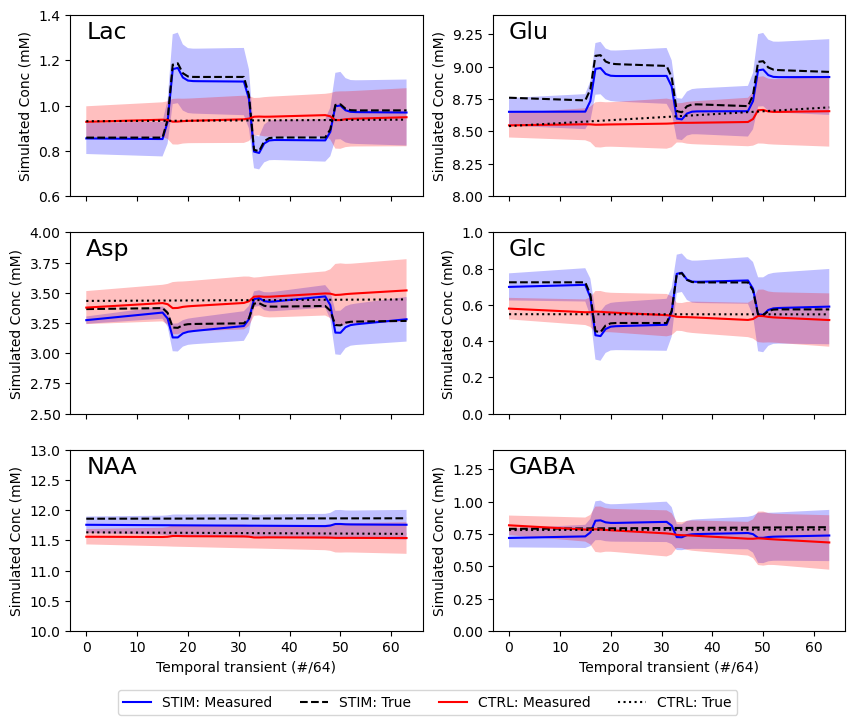

In [345]:
design_mat = pd.read_csv('fsl_mrs_fmrs_demo/designmat.csv',header=None).to_numpy()

true_betas = true_concs.groupby(axis=0, level=1).mean().T
df_stim_beta = df_stim.filter(regex='conc_[a-zA-Z\+]+_beta\d', axis=0)
df_stim_beta.index = pd.MultiIndex.from_tuples(df_stim_beta.index.str.replace('conc_','').str.split('_',n=1).to_list())
df_ctrl_beta = df_ctrl.filter(regex='conc_[a-zA-Z\+]+_beta\d', axis=0)
df_ctrl_beta.index = pd.MultiIndex.from_tuples(df_ctrl_beta.index.str.replace('conc_','').str.split('_',n=1).to_list())

def plot_traces(ax, metab, color_stim, color_ctrl, labels=False):
    x_fill = np.arange(0,64).tolist()+np.flip(np.arange(0, 64)).tolist()

    if labels:
        label_txt = ['STIM: Measured', 'STIM: True', 'CTRL: Measured', 'CTRL: True']
    else:
        label_txt = [None, ] * 4

    # STIM first
    true_trace = true_betas.loc[metab,'stim'].to_numpy() @ design_mat.T
    metab_trace = scale_metabs * df_stim_beta.loc[metab,'COPE'].to_numpy() @ design_mat.T
    metab_var = scale_metabs * df_stim_beta.loc[metab,'VARCOPE'].pow(0.5).to_numpy() @ design_mat.T
    pos_err = metab_trace+metab_var
    neg_err = metab_trace-metab_var
    y_fill = pos_err.tolist() + np.flip(neg_err).tolist()

    # Plot stim
    ax.plot(metab_trace, label=label_txt[0], color=color_stim)
    ax.fill_between(x_fill, y_fill, alpha=0.25, facecolor=color_stim)
    ax.plot(true_trace,'k--', label=label_txt[1])
    
    # CTRL
    true_trace = true_betas.loc[metab,'ctrl'].to_numpy() @ design_mat.T
    metab_trace = scale_metabs * df_ctrl_beta.loc[metab,'COPE'].to_numpy() @ design_mat.T
    metab_var = scale_metabs * df_ctrl_beta.loc[metab,'VARCOPE'].pow(0.5).to_numpy() @ design_mat.T
    pos_err = metab_trace+metab_var
    neg_err = metab_trace-metab_var
    y_fill = pos_err.tolist() + np.flip(neg_err).tolist()

    # Plot ctrl
    ax.plot(metab_trace, label=label_txt[2], color=color_ctrl)
    ax.fill_between(x_fill, y_fill, alpha=0.25, facecolor=color_ctrl)
    ax.plot(true_trace,'k:', label=label_txt[3])

metab_limits = {
    'Lac': ([0, 0], [0.6, 1.4]),
    'Glu': ([0, 1], [8, 9.4]),
    'Asp': ([1, 0], [2.5, 4]),
    'Glc': ([1, 1], [0, 1]),
    'NAA': ([2, 0], [10, 13]),
    'GABA': ([2, 1], [0, 1.4]),}
fig, axes = plt.subplots(3, 2, figsize=(10, 8), sharex=True)
for met, settings in metab_limits.items():
    curr_ax = axes[settings[0][0], settings[0][1]]
    if met == 'Lac':
        plot_traces(curr_ax, met, 'b', 'r', labels=True)
    else:
        plot_traces(curr_ax, met, 'b', 'r')
    curr_ax.set_ylim(settings[1])
    curr_ax.text(0, 0.87 * (settings[1][1]-settings[1][0])+settings[1][0], met, fontdict={'size':17})
    curr_ax.set_ylabel('Simulated Conc (mM)')
fig.legend(loc=8, ncols=4)
for ax in axes[2]:
    ax.set_xlabel('Temporal transient (#/64)')

plt.savefig('../../publication/figures/fig6_simulation_traces.png', dpi=400, bbox_inches='tight', transparent=True)
